# ACTIVIDAD GRUPAL

Funciones f(x)=sin(x), f(x)=1/(1+(25*x^2)), f(x)=exp(-20*x^2)

Importar Librerias

In [572]:
import numpy as np
import scipy as sc
import matplotlib
from matplotlib import pyplot as pplot
import math
import random
import sympy

Funcion Main, principal funcion a ejecutar en el codigo, se utiliza tambien para calculas los nodos de chebyshev usando la libreria polynomial.chebyshev.fit para ajustar los valores de los nodos equidistantes a una serie de chebyshev, posteriormente se utiliza el metodo linespace para obtener los nodos de la serie de chebyshev(regresa una tupla con valores de x y y)

In [583]:
def main():
    #Primero obtenemos los vectores para 11 nodos equiespaciados
    # y 21 nodos equiespaciados
    nodosx = obtenerNodos()
    nodosy = {}
    #calculamos los valores de f(x) para cada una de las funciones
    # y para cada uno de los vectores de x(11 nodos y 21 nodos)
    for key in nodosx:
        nodosy[key + 'Fun1']=np.sin(nodosx.get(key))
        nodosy[key + 'Fun2']=np.array(list(map(lambda x: 1/(1+(25*(x**2))), nodosx.get(key))))
        nodosy[key + 'Fun3']=np.exp(-20*(nodosx.get(key)**2))
    #Para obtener los nodos de chebyshev, primero ajustamos el polinomio utilizando los datos
    #obtenidos de (x, f(x)) y con eso podemos obtener los nodos de chebyshev para grado 10 y 20
    #(11 y 21 puntos)
    cheb11Fun1=np.polynomial.Chebyshev.fit(nodosx.get('nodos11E'), nodosy.get('nodos11EFun1'), np.size(nodosx.get('nodos11E'))-1)
    cheb11Fun2=np.polynomial.Chebyshev.fit(nodosx.get('nodos11E'), nodosy.get('nodos11EFun2'), np.size(nodosx.get('nodos11E'))-1)
    cheb11Fun3=np.polynomial.Chebyshev.fit(nodosx.get('nodos11E'), nodosy.get('nodos11EFun3'), np.size(nodosx.get('nodos11E'))-1)
    cheb21Fun1=np.polynomial.Chebyshev.fit(nodosx.get('nodos21E'), nodosy.get('nodos21EFun1'), np.size(nodosx.get('nodos21E'))-1)
    cheb21Fun2=np.polynomial.Chebyshev.fit(nodosx.get('nodos21E'), nodosy.get('nodos21EFun2'), np.size(nodosx.get('nodos21E'))-1)
    cheb21Fun3=np.polynomial.Chebyshev.fit(nodosx.get('nodos21E'), nodosy.get('nodos21EFun3'), np.size(nodosx.get('nodos21E'))-1)
    #mapeamos los resultados a un diccionario para utilizarlo
    # despues
    nodosy["nodos11ChebFun1"] = cheb11Fun1.linspace(11)[1]
    nodosy["nodos11ChebFun2"] = cheb11Fun2.linspace(11)[1]
    nodosy["nodos11ChebFun3"] = cheb11Fun3.linspace(11)[1]
    nodosy["nodos21ChebFun1"] = cheb21Fun1.linspace(21)[1]
    nodosy["nodos21ChebFun2"] = cheb21Fun2.linspace(21)[1]
    nodosy["nodos21ChebFun3"] = cheb21Fun3.linspace(21)[1]
    nodosx["nodos11ChebFun1"] = cheb11Fun1.linspace(11)[0]
    nodosx["nodos11ChebFun2"] = cheb11Fun2.linspace(11)[0]
    nodosx["nodos11ChebFun3"] = cheb11Fun3.linspace(11)[0]
    nodosx["nodos21ChebFun1"] = cheb21Fun1.linspace(21)[0]
    nodosx["nodos21ChebFun2"] = cheb21Fun2.linspace(21)[0]
    nodosx["nodos21ChebFun3"] = cheb21Fun3.linspace(21)[0]

    calcularInterpolacion(nodosx, nodosy)
    
    funcion=calculoDiferenciasDivididas()


Funcion Obtener Nodos, se utiliza para calcular los nodos equidistantes que se utilizaran posteriormente

In [573]:
def obtenerNodos():
    """Esta funcion obtiene los sigueintes valores y regresa
    un dicionario con los las listas correspondientes
    -11 Nodos Equiespaciados
    -21 Nodos Equiespaciados
    -11 Nodos de Chebyshev
    -21 Nodos de Chebyshev"""
    #El Dominio de todas las Funcion es R
    
    #Usar libreria rand para obtener valores aleatorios 
    #para cada uno de los metodos
    #valorInicial=random.randint(-100, 100)
    #valorFinal=random.randint(-100, 100)
    valorInicial=-5
    valorFinal=5
    #En dado caso que sean el mismo numero, seguir obteniendo
    #hasta que sean diferentes
    while valorInicial == valorFinal or valorFinal < valorInicial:
        valorFinal = random.randint(-100, 100)
    nodos11E=np.linspace(valorInicial,valorFinal,11)
    nodos21E=np.linspace(valorInicial,valorFinal,21)
    # regresar un diccionario con los vectores para uso posterior
    respuesta = {
        "nodos11E": nodos11E,
        "nodos21E": nodos21E,
    }
    
    return respuesta

Una vez que se tienen las coordenadas (x,y), la siguiente funcion se utiliza para obtener los polinomios de 
lagrande y barymetric, se grafican los puntos para comparar las diferencias entre los nodos equiespaciados y los
puntos obtenidos por la serie de chebyshev. Ademas de que se muestra tambien el comportamiento del polinomio(esto debido
a que es complicado visualizar el comportamiento del polinomio, con solo los puntos)

In [574]:
def calcularInterpolacion(nodosx, nodosy):
    """Esta funcion calcula el polinomio de interpolacion"""
    
    #Primero hay que mapear las coordenadas respectivas 
    #de cada funcion para facil manejo
    x11E=nodosx.get("nodos11E")
    x21E=nodosx.get("nodos21E")
    x11ChebFun1=nodosx.get("nodos11ChebFun1")
    x11ChebFun2=nodosx.get("nodos11ChebFun2")
    x11ChebFun3=nodosx.get("nodos11ChebFun3")
    x21ChebFun1=nodosx.get("nodos21ChebFun1")
    x21ChebFun2=nodosx.get("nodos21ChebFun2")
    x21ChebFun3=nodosx.get("nodos21ChebFun3")
    y11EFun1=nodosy.get('nodos11EFun1')
    y21EFun1=nodosy.get('nodos21EFun1')
    y11EFun2=nodosy.get('nodos11EFun2')
    y21EFun2=nodosy.get('nodos21EFun2')
    y11EFun3=nodosy.get('nodos11EFun3')
    y21EFun3=nodosy.get('nodos21EFun3')
    y11ChebFun1=nodosy.get('nodos11ChebFun1')
    y11ChebFun2=nodosy.get('nodos11ChebFun2')
    y11ChebFun3=nodosy.get('nodos11ChebFun3')
    y21ChebFun1=nodosy.get('nodos21ChebFun1')
    y21ChebFun2=nodosy.get('nodos21ChebFun2')
    y21ChebFun3=nodosy.get('nodos21ChebFun3')
    
    #crear las interpolaciones para cada caso
    barycentricPoly11EFun1=sc.interpolate.barycentric_interpolate(x11E, y11EFun1, np.linspace(min(x11E),max(x11E), num=11))
    barycentricPoly21EFun1=sc.interpolate.barycentric_interpolate(x21E, y21EFun1, np.linspace(min(x21E),max(x21E), num=21))
    barycentricPoly11ChebFun1=sc.interpolate.barycentric_interpolate(x11ChebFun1, y11ChebFun1, np.linspace(min(x11ChebFun1),max(x11ChebFun1), num=11))
    barycentricPoly21ChebFun1=sc.interpolate.barycentric_interpolate(x21ChebFun1, y21ChebFun1, np.linspace(min(x21ChebFun1),max(x21ChebFun1), num=21))
    barycentricPoly11EFun2=sc.interpolate.barycentric_interpolate(x11E, y11EFun2, np.linspace(min(x11E),max(x11E), num=11))
    barycentricPoly21EFun2=sc.interpolate.barycentric_interpolate(x21E, y21EFun2, np.linspace(min(x21E),max(x21E), num=21))
    barycentricPoly11ChebFun2=sc.interpolate.barycentric_interpolate(x11ChebFun2, y11ChebFun2, np.linspace(min(x11ChebFun2),max(x11ChebFun2), num=11))
    barycentricPoly21ChebFun2=sc.interpolate.barycentric_interpolate(x21ChebFun2, y21ChebFun2, np.linspace(min(x21ChebFun2),max(x21ChebFun2), num=21))    
    barycentricPoly11EFun3=sc.interpolate.barycentric_interpolate(x11E, y11EFun3, np.linspace(min(x11E),max(x11E), num=11))
    barycentricPoly21EFun3=sc.interpolate.barycentric_interpolate(x21E, y21EFun3, np.linspace(min(x21E),max(x21E), num=21))
    barycentricPoly11ChebFun3=sc.interpolate.barycentric_interpolate(x11ChebFun3, y11ChebFun3, np.linspace(min(x11ChebFun3),max(x11ChebFun3), num=11))
    barycentricPoly21ChebFun3=sc.interpolate.barycentric_interpolate(x21ChebFun3, y21ChebFun3, np.linspace(min(x21ChebFun3),max(x21ChebFun3), num=21))
    
    lagrangePoly11EFun1=sc.interpolate.lagrange(x11E, y11EFun1)
    lagrangePoly21EFun1=sc.interpolate.lagrange(x21E, y21EFun1)
    lagrangePoly11ChebFun1=sc.interpolate.lagrange(x11ChebFun1, y11ChebFun1)
    lagrangePoly21ChebFun1=sc.interpolate.lagrange(x21ChebFun1, y21ChebFun1)
    lagrangePoly11EFun2=sc.interpolate.lagrange(x11E, y11EFun2)
    lagrangePoly21EFun2=sc.interpolate.lagrange(x21E, y21EFun2)
    lagrangePoly11ChebFun2=sc.interpolate.lagrange(x11ChebFun2, y11ChebFun2)
    lagrangePoly21ChebFun2=sc.interpolate.lagrange(x21ChebFun2, y21ChebFun2)
    lagrangePoly11EFun3=sc.interpolate.lagrange(x11E, y11EFun3)
    lagrangePoly21EFun3=sc.interpolate.lagrange(x21E, y21EFun3)
    lagrangePoly11ChebFun3=sc.interpolate.lagrange(x11ChebFun3, y11ChebFun3)
    lagrangePoly21ChebFun3=sc.interpolate.lagrange(x21ChebFun3, y21ChebFun3)
    
    fig,ax = mp.pyplot.subplots(3,2, figsize=(16, 16))
    x=np.linspace(min(x11E),max(x11E),200)
    ax[0,0].plot(x, np.sin(x), color="red", label='f(x)=sin(x)')
    ax[0,0].plot(x11E, barycentricPoly11EFun1, "o", color="k", label='11 n equiespaciados bar')
    ax[0,0].plot(x11ChebFun1, barycentricPoly11ChebFun1, "s", color="b", label='11 n Chebyshev bar')
    ax[0,0].plot(x11E, lagrangePoly11EFun1(x11E), "X", color="g", label='11 n equiespaciados lag')
    ax[0,0].plot(x11ChebFun1, lagrangePoly11ChebFun1(x11ChebFun1), "D", color="y", label='11 n Chebyshev lag')
    ax[0,0].set_xlabel("x")
    ax[0,0].set_ylabel("y")
    ax[0,0].grid()
    ax[0,0].legend(loc='upper right')
    
    #fig2,ax2 = mp.pyplot.subplots()
    x=np.linspace(min(x21E),max(x21E),200)
    ax[0,1].plot(x, np.sin(x), color="red", label='f(x)=sin(x)')
    ax[0,1].plot(x21E, barycentricPoly21EFun1, "o", color="k", label='21 n equiespaciados bar')
    ax[0,1].plot(x21ChebFun1, barycentricPoly21ChebFun1, "s", color="b", label='21 n Chebyshev bar')
    ax[0,1].plot(x21E, lagrangePoly21EFun1(x21E), "X", color="g", label='21 n equiespaciados lag')
    ax[0,1].plot(x21ChebFun1, lagrangePoly21ChebFun1(x21ChebFun1), "D", color="y", label='21 n Chebyshev lag')
    ax[0,1].set_xlabel("x")
    ax[0,1].set_ylabel("y")
    ax[0,1].grid()
    ax[0,1].legend(loc='upper right')
    
    #fi3,ax3 = mp.pyplot.subplots()
    x=np.linspace(min(x11E),max(x11E),200)
    ax[1,0].plot(x, 1/(1+(25*(x**2))), color="red", label='f(x)=1/(1+(25*x^2))')
    ax[1,0].plot(x11E, barycentricPoly11EFun2, "o", color="k", label='11 n equiespaciados bar')
    ax[1,0].plot(x11ChebFun2, barycentricPoly11ChebFun2, "s", color="b", label='11 n Chebyshev bar')
    ax[1,0].plot(x11E, lagrangePoly11EFun2(x11E), "X", color="g", label='11 n equiespaciados lag')
    ax[1,0].plot(x11ChebFun2, lagrangePoly11ChebFun2(x11ChebFun2), "D", color="y", label='11 n Chebyshev lag')
    ax[1,0].set_xlabel("x")
    ax[1,0].set_ylabel("y")
    ax[1,0].grid()
    ax[1,0].legend(loc='upper right')
    
    #fi4,ax4 = mp.pyplot.subplots()
    x=np.linspace(min(x21E),max(x21E),200)
    ax[1,1].plot(x, 1/(1+(25*(x**2))), color="red", label='f(x)=1/(1+(25*x^2))')
    ax[1,1].plot(x21E, barycentricPoly21EFun2, "o", color="k", label='21 n equiespaciados bar')
    ax[1,1].plot(x21ChebFun2, barycentricPoly21ChebFun2, "s", color="b", label='21 n Chebyshev bar')
    ax[1,1].plot(x21E, lagrangePoly21EFun2(x21E), "X", color="g", label='21 n equiespaciados lag')
    ax[1,1].plot(x21ChebFun2, lagrangePoly21ChebFun2(x21ChebFun2), "D", color="y", label='21 n Chebyshev lag')
    ax[1,1].set_xlabel("x")
    ax[1,1].set_ylabel("y")
    ax[1,1].grid()
    ax[1,1].legend(loc='upper right')
    
    #fig5,ax5 = mp.pyplot.subplots()
    x=np.linspace(min(x11E),max(x11E),200)
    ax[2,0].plot(x, np.exp(-20*(x)**2), color="red", label='f(x)=exp(-20*x^2)')
    ax[2,0].plot(x11E, barycentricPoly11EFun3, "o", color="k", label='11 n equiespaciados bar')
    ax[2,0].plot(x11ChebFun3, barycentricPoly11ChebFun3, "s", color="b", label='11 n Chebyshev bar')
    ax[2,0].plot(x11E, lagrangePoly11EFun3(x11E), "X", color="g", label='11 n equiespaciados lag')
    ax[2,0].plot(x11ChebFun3, lagrangePoly11ChebFun3(x11ChebFun3), "D",color="y", label='11 n Chebyshev lag')
    ax[2,0].set_xlabel("x")
    ax[2,0].set_ylabel("y")
    ax[2,0].grid()
    ax[2,0].legend(loc='upper right')
    
    #fig6,ax6 = mp.pyplot.subplots()
    x=np.linspace(min(x21E),max(x21E),200)
    ax[2,1].plot(x, np.exp(-20*(x)**2), color="red", label='f(x)=exp(-20*x^2)')
    ax[2,1].plot(x21E, barycentricPoly21EFun3, "o", color="k", label='21 n equiespaciados bar')
    ax[2,1].plot(x21ChebFun3, barycentricPoly21ChebFun3, "s", color="b", label='21 n Chebyshev bar')
    ax[2,1].plot(x21E, lagrangePoly21EFun3(x21E), "X", color="g", label='21 n equiespaciados lag')
    ax[2,1].plot(x21ChebFun3, lagrangePoly21ChebFun3(x21ChebFun3), "D", color="y", label='21 n Chebyshev lag')
    ax[2,1].set_xlabel("x")
    ax[2,1].set_ylabel("y")
    ax[2,1].grid()
    ax[2,1].legend(loc='upper right')
    
    #Generar nuevas visualizaciones con mayor numero de puntos para mejor comparacion
    cpoly11EFun1=np.polynomial.polynomial.polyfit(x11E, y11EFun1, np.size(x11E)-1)
    cpoly11EFun2=np.polynomial.polynomial.polyfit(x11E, y11EFun2, np.size(x11E)-1)
    cpoly11EFun3=np.polynomial.polynomial.polyfit(x11E, y11EFun3, np.size(x11E)-1)
    cpoly21EFun1=np.polynomial.polynomial.polyfit(x21E, y21EFun1, np.size(x21E)-1)
    cpoly21EFun2=np.polynomial.polynomial.polyfit(x21E, y21EFun2, np.size(x21E)-1)
    cpoly21EFun3=np.polynomial.polynomial.polyfit(x21E, y21EFun3, np.size(x21E)-1)
    cpoly11ChebFun1=np.polynomial.polynomial.polyfit(x11ChebFun1, y11ChebFun1, np.size(x11ChebFun1)-1)
    cpoly11ChebFun2=np.polynomial.polynomial.polyfit(x11ChebFun2, y11ChebFun2, np.size(x11ChebFun2)-1)
    cpoly11ChebFun3=np.polynomial.polynomial.polyfit(x11ChebFun3, y11ChebFun3, np.size(x11ChebFun3)-1)
    cpoly21ChebFun1=np.polynomial.polynomial.polyfit(x21ChebFun1, y21ChebFun1, np.size(x21ChebFun1)-1)
    cpoly21ChebFun2=np.polynomial.polynomial.polyfit(x21ChebFun2, y21ChebFun2, np.size(x21ChebFun2)-1)
    cpoly21ChebFun3=np.polynomial.polynomial.polyfit(x21ChebFun3, y21ChebFun3, np.size(x21ChebFun3)-1)
    
    poly11EFun1=np.polynomial.polynomial.Polynomial(cpoly11EFun1)
    poly11EFun2=np.polynomial.polynomial.Polynomial(cpoly11EFun2)
    poly11EFun3=np.polynomial.polynomial.Polynomial(cpoly11EFun3)
    poly21EFun1=np.polynomial.polynomial.Polynomial(cpoly21EFun1)
    poly21EFun2=np.polynomial.polynomial.Polynomial(cpoly21EFun2)
    poly21EFun3=np.polynomial.polynomial.Polynomial(cpoly21EFun3)
    poly11ChebFun1=np.polynomial.polynomial.Polynomial(cpoly11ChebFun1)
    poly11ChebFun2=np.polynomial.polynomial.Polynomial(cpoly11ChebFun2)
    poly11ChebFun3=np.polynomial.polynomial.Polynomial(cpoly11ChebFun3)
    poly21ChebFun1=np.polynomial.polynomial.Polynomial(cpoly21ChebFun1)
    poly21ChebFun2=np.polynomial.polynomial.Polynomial(cpoly21ChebFun2)
    poly21ChebFun3=np.polynomial.polynomial.Polynomial(cpoly21ChebFun3)
     
    fig2,ax2 = mp.pyplot.subplots(3,1, figsize=(16, 16))
    x=np.linspace(min(x11E),max(x11E),200)
    ax2[0].plot(x, np.sin(x), color="red", label='f(x)=sin(x)')
    ax2[0].plot(x, poly11EFun1(x), ":", color="k", label='Pol grado 10 e')
    ax2[0].plot(x, poly21EFun1(x), "--", color="b", label='Pol grado 20 e')
    ax2[0].set_xlabel("x")
    ax2[0].set_ylabel("y")
    ax2[0].grid()
    ax2[0].legend(loc='upper right')

    #fi3,ax3 = mp.pyplot.subplots()
    x=np.linspace(min(x11E),max(x11E),200)
    ax2[1].plot(x, 1/(1+(25*(x**2))), color="red", label='f(x)=1/(1+(25*x^2))')
    ax2[1].plot(x, poly11EFun2(x), ":", color="k", label='Pol grado 10 e')
    ax2[1].plot(x, poly21EFun2(x), "--", color="b", label='Pol grado 20 e')
    ax2[1].set_xlabel("x")
    ax2[1].set_ylabel("y")
    ax2[1].grid()
    ax2[1].legend(loc='upper right')
    
    #fig5,ax5 = mp.pyplot.subplots()
    x=np.linspace(min(x11E),max(x11E),200)
    ax2[2].plot(x, np.exp(-20*(x)**2), color="red", label='f(x)=exp(-20*x^2)')
    ax2[2].plot(x, poly11EFun3(x), ":", color="k", label='Pol grado 10 e')
    ax2[2].plot(x, poly21EFun3(x), "--", color="b", label='Pol grado 20 e')
    ax2[2].set_xlabel("x")
    ax2[2].set_ylabel("y")
    ax2[2].grid()
    ax2[2].legend(loc='upper right')


In [584]:
"""def calcularError(real, interpolado):
    
    return error"""

'def calcularError(real, interpolado):\n    \n    return error'

La siguiente funcion calcula las diferencias divididas de manera iterativa sobre 3 coordenadas (x,y).
Posteriormente se utiliza calculo simbolico usando la libreria de sympy para obtener el polinomio (ademas de que se
imprime)

In [585]:
def calculoDiferenciasDivididas():
    """Esta funcion calcula las diferencias divididas de 3 puntos (x,y)"""
    puntosx = [0, 1, 2]
    puntosy = [-1, -1, 7]
    f=[]
    f2=[]
    for i, punto in enumerate(puntosx):
        if i==0:
            continue
        f.append((puntosy[i]-puntosy[i-1])/(punto-puntosx[i-1]))
    
    for i, value in enumerate(f):
        if i==0:
            continue
        f2.append((value-f[i-1])/(puntosx[i+1]-puntosx[i-1]))

    x = sympy.Symbol("x")
    funcion = puntosy[0]+(f[0]*(x-puntosx[0]))+(f2[0]*(x-puntosx[0])*(x-puntosx[1]))
    funcion=funcion.expand()
    print(funcion)
    return funcion.expand

Lammar a la funcion main para que se ejecute todo el script, no se hace uso de try-except debido a que no se le encuentra algun uso por lo pronto

4.0*x**2 - 4.0*x - 1


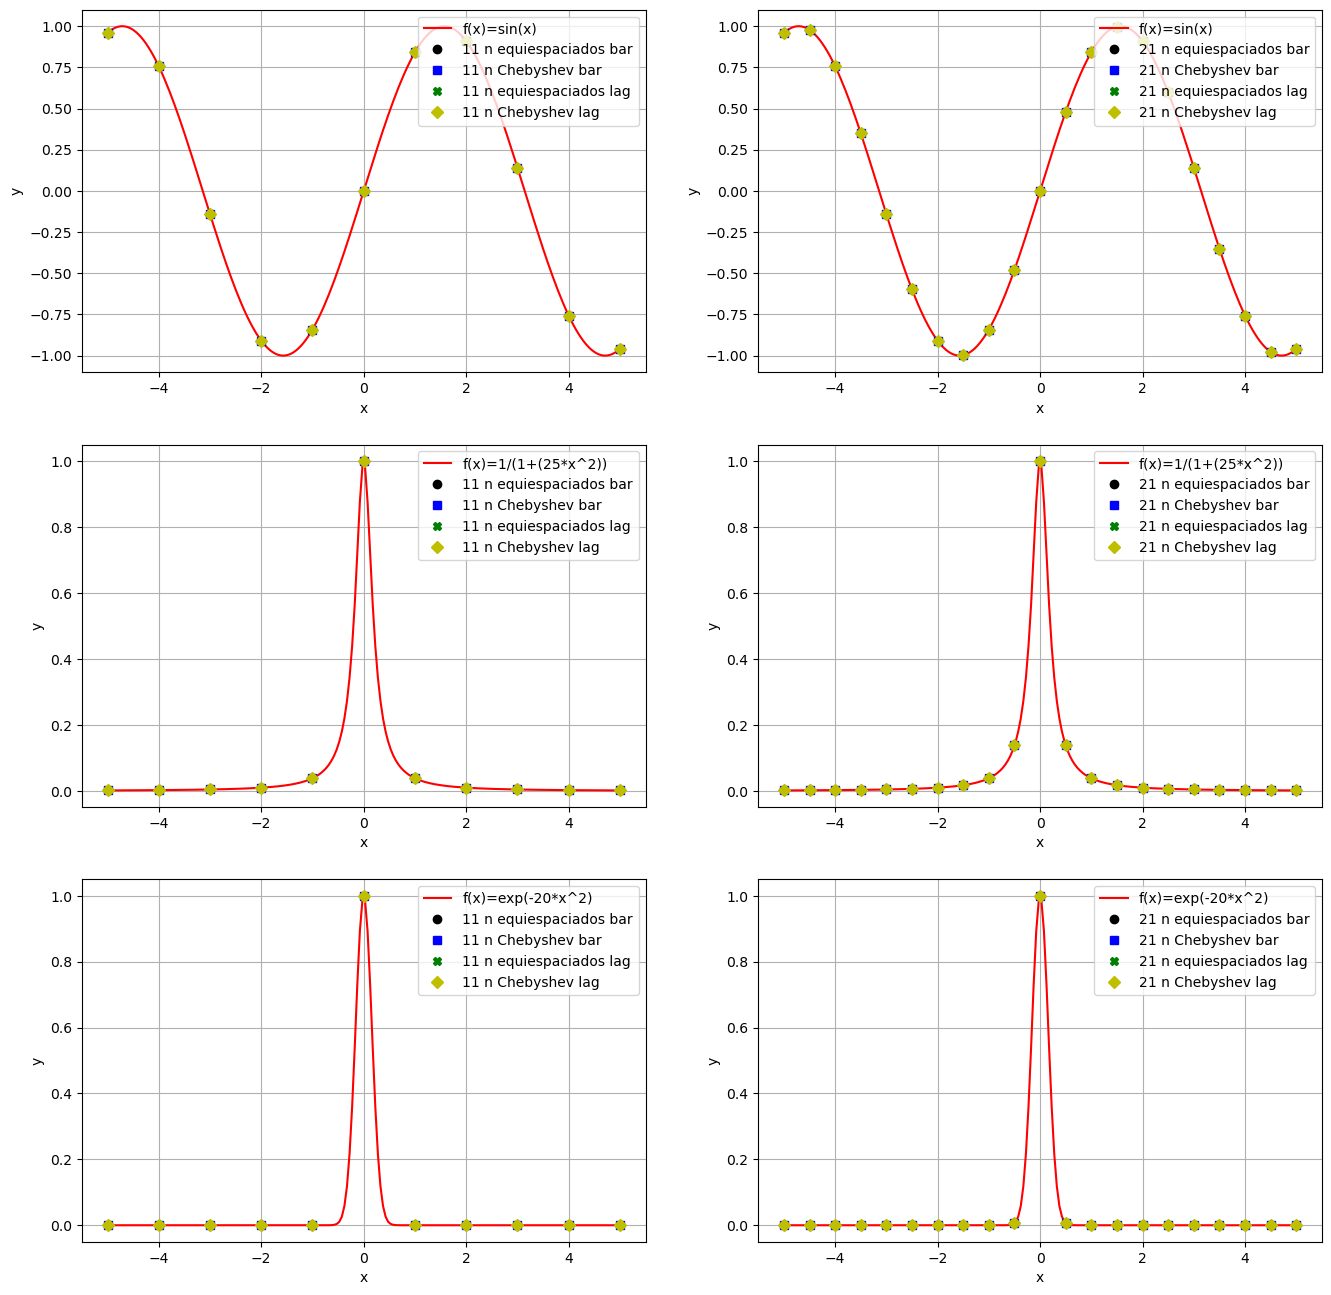

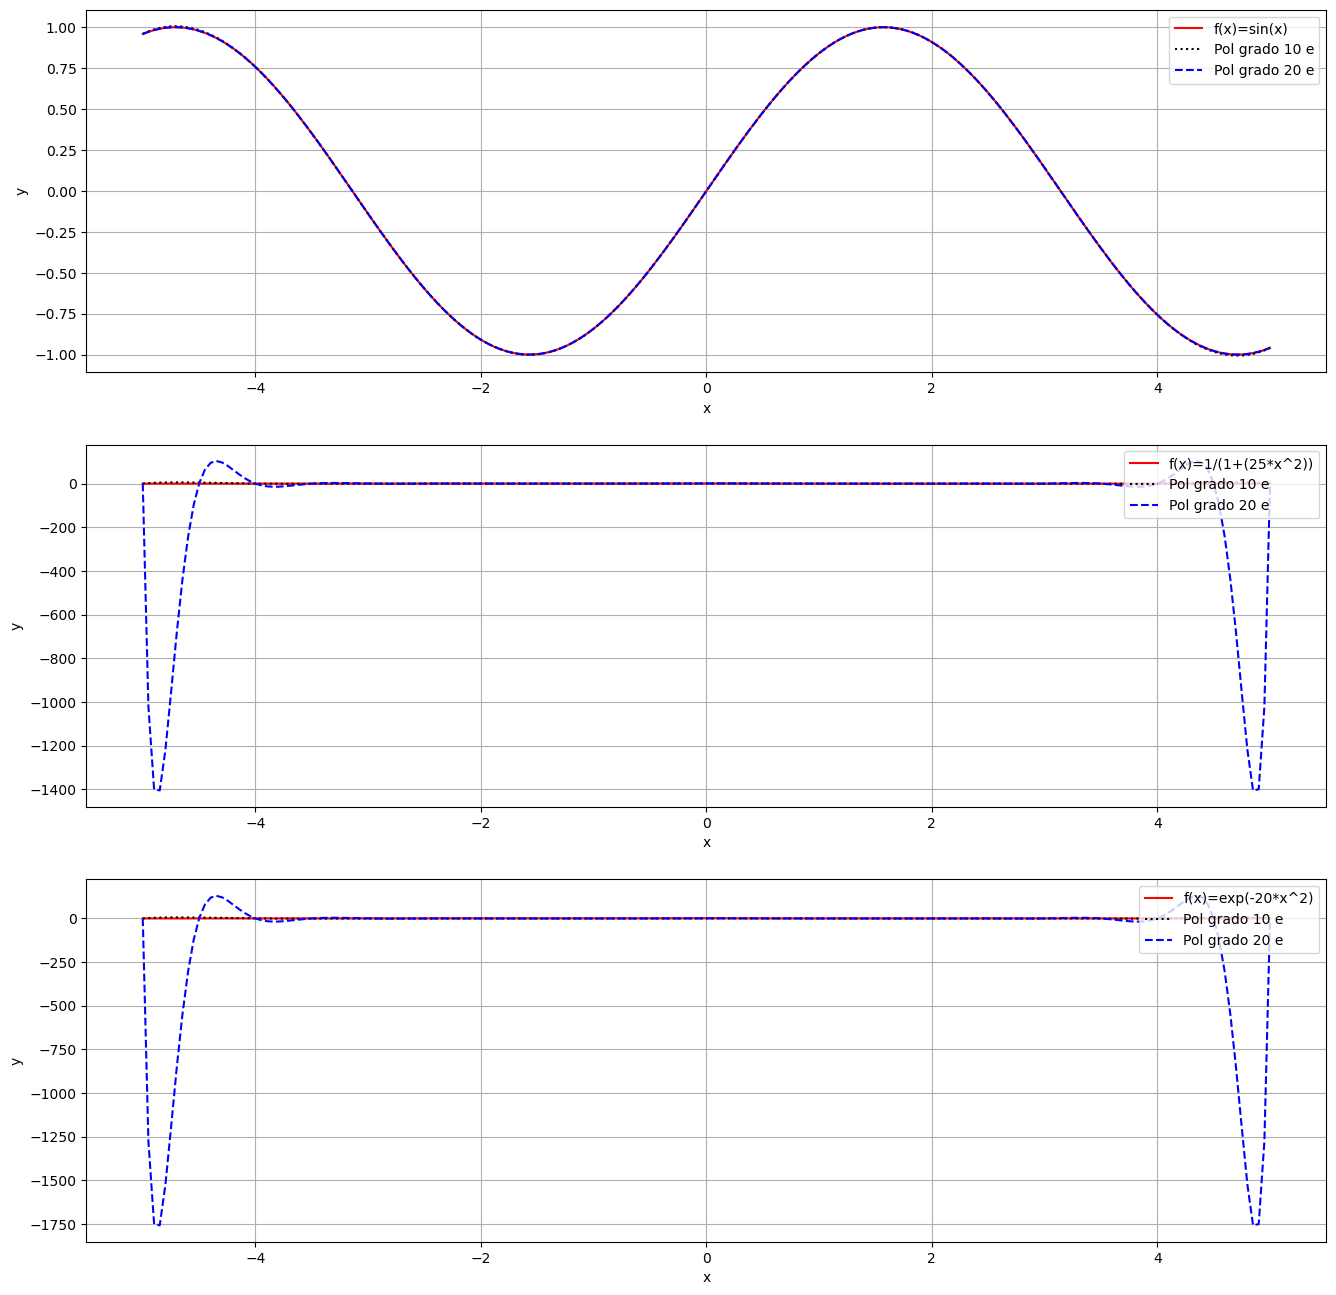

In [586]:
main()